In [83]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from darts.datasets import AirPassengersDataset
from darts import TimeSeries

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
# Import data using datetime and set index to datetime
df = pd.read_csv(r'C:\Users\91783\Desktop\DataSet\1_Bhiwadi\Book_1_PM.csv',
                                parse_dates=['Date'],
                                index_col=['Date'])

df.head()

C:\Users\91783\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '13-01-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\91783\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '14-01-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\91783\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '15-01-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\91783\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16-01-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\91783\anaconda3\lib

,PM2.5
Date,
2021-01-01,228.53
2021-02-01,222.37
2021-03-01,128.14
2021-04-01,68.44
2021-05-01,62.51


In [85]:
def convert2matrix(data_arr, look_back):
    X, Y =[], []
    for i in range(len(data_arr)-look_back):
        d=i+look_back  
        X.append(data_arr[i:d,])
        Y.append(data_arr[d,])
        return np.array(X), np.array(Y)

In [86]:
#Split data set into testing dataset and train dataset
train_size = 300
train, test =df.values[0:train_size,:],df.values[train_size:len(df.values),:]
# setup look_back window 
look_back = 30
#convert dataset into right shape in order to input into the DNN
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

In [87]:

from keras.models import Sequential
from keras.layers import Dense
def model_dnn(look_back):
    model=Sequential()
    model.add(Dense(units=32, input_dim=look_back, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [88]:
model=model_dnn(look_back)


In [89]:
def call(c):
    history=model.fit(trainX,trainY, epochs=c, batch_size=30, verbose=2, validation_data=(testX,testY),callbacks=[EarlyStopping(monitor='val_loss', patience=10)],shuffle=False)

    def model_loss(history):
        plt.figure(figsize=(8,4))
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Test Loss')
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epochs')
        plt.legend(loc='upper right')
        plt.show();
    
    train_score = model.evaluate(trainX, trainY, verbose=0)
    print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
    % (np.sqrt(train_score[1]), train_score[2]))
    test_score = model.evaluate(testX, testY, verbose=0)
    print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
    % (np.sqrt(test_score[1]), test_score[2]))
    model_loss(history)

Epoch 1/50
1/1 - 0s - loss: 10826.3408 - mse: 10826.3408 - mae: 104.0497 - val_loss: 7803.7661 - val_mse: 7803.7661 - val_mae: 88.3389 - 389ms/epoch - 389ms/step
Epoch 2/50
1/1 - 0s - loss: 8459.7451 - mse: 8459.7451 - mae: 91.9769 - val_loss: 5305.6606 - val_mse: 5305.6606 - val_mae: 72.8400 - 28ms/epoch - 28ms/step
Epoch 3/50
1/1 - 0s - loss: 6417.3618 - mse: 6417.3618 - mae: 80.1084 - val_loss: 3303.5676 - val_mse: 3303.5676 - val_mae: 57.4767 - 19ms/epoch - 19ms/step
Epoch 4/50
1/1 - 0s - loss: 4683.3438 - mse: 4683.3438 - mae: 68.4350 - val_loss: 1797.8177 - val_mse: 1797.8177 - val_mae: 42.4007 - 18ms/epoch - 18ms/step
Epoch 5/50
1/1 - 0s - loss: 3324.8105 - mse: 3324.8105 - mae: 57.6612 - val_loss: 770.4953 - val_mse: 770.4953 - val_mae: 27.7578 - 20ms/epoch - 20ms/step
Epoch 6/50
1/1 - 0s - loss: 2228.4153 - mse: 2228.4153 - mae: 47.2061 - val_loss: 186.3273 - val_mse: 186.3273 - val_mae: 13.6502 - 19ms/epoch - 19ms/step
Epoch 7/50
1/1 - 0s - loss: 1371.7457 - mse: 1371.7457 - 

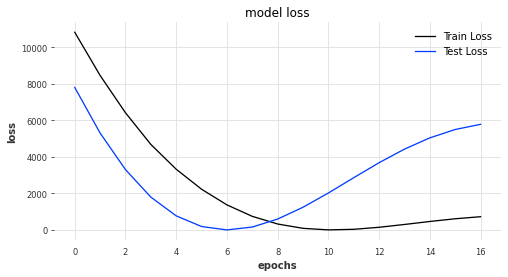

Epoch 1/100
1/1 - 0s - loss: 792.0172 - mse: 792.0172 - mae: 28.1428 - val_loss: 5894.7744 - val_mse: 5894.7744 - val_mae: 76.7774 - 39ms/epoch - 39ms/step
Epoch 2/100
1/1 - 0s - loss: 811.9260 - mse: 811.9260 - mae: 28.4943 - val_loss: 5845.0479 - val_mse: 5845.0479 - val_mae: 76.4529 - 19ms/epoch - 19ms/step
Epoch 3/100
1/1 - 0s - loss: 786.5977 - mse: 786.5977 - mae: 28.0463 - val_loss: 5655.5342 - val_mse: 5655.5342 - val_mae: 75.2033 - 19ms/epoch - 19ms/step
Epoch 4/100
1/1 - 0s - loss: 723.3618 - mse: 723.3618 - mae: 26.8954 - val_loss: 5352.5444 - val_mse: 5352.5444 - val_mae: 73.1611 - 19ms/epoch - 19ms/step
Epoch 5/100
1/1 - 0s - loss: 632.1722 - mse: 632.1722 - mae: 25.1430 - val_loss: 4941.6411 - val_mse: 4941.6411 - val_mae: 70.2968 - 19ms/epoch - 19ms/step
Epoch 6/100
1/1 - 0s - loss: 524.0750 - mse: 524.0750 - mae: 22.8927 - val_loss: 4478.1450 - val_mse: 4478.1450 - val_mae: 66.9189 - 19ms/epoch - 19ms/step
Epoch 7/100
1/1 - 0s - loss: 409.9608 - mse: 409.9608 - mae: 20.

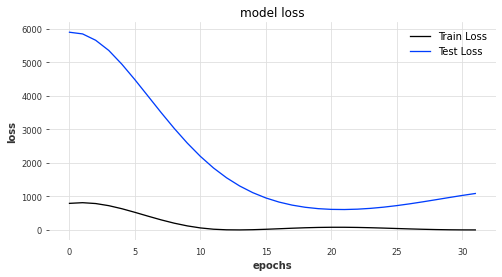

Epoch 1/150
1/1 - 0s - loss: 1.1326 - mse: 1.1326 - mae: 1.0642 - val_loss: 1137.3873 - val_mse: 1137.3873 - val_mae: 33.7252 - 35ms/epoch - 35ms/step
Epoch 2/150
1/1 - 0s - loss: 3.5983 - mse: 3.5983 - mae: 1.8969 - val_loss: 1180.2438 - val_mse: 1180.2438 - val_mae: 34.3547 - 19ms/epoch - 19ms/step
Epoch 3/150
1/1 - 0s - loss: 6.6953 - mse: 6.6953 - mae: 2.5875 - val_loss: 1212.9642 - val_mse: 1212.9642 - val_mae: 34.8276 - 18ms/epoch - 18ms/step
Epoch 4/150
1/1 - 0s - loss: 9.7518 - mse: 9.7518 - mae: 3.1228 - val_loss: 1234.6083 - val_mse: 1234.6083 - val_mae: 35.1370 - 18ms/epoch - 18ms/step
Epoch 5/150
1/1 - 0s - loss: 12.2222 - mse: 12.2222 - mae: 3.4960 - val_loss: 1244.8430 - val_mse: 1244.8430 - val_mae: 35.2823 - 17ms/epoch - 17ms/step
Epoch 6/150
1/1 - 0s - loss: 13.7433 - mse: 13.7433 - mae: 3.7072 - val_loss: 1243.9161 - val_mse: 1243.9161 - val_mae: 35.2692 - 17ms/epoch - 17ms/step
Epoch 7/150
1/1 - 0s - loss: 14.1535 - mse: 14.1535 - mae: 3.7621 - val_loss: 1232.6265 - 

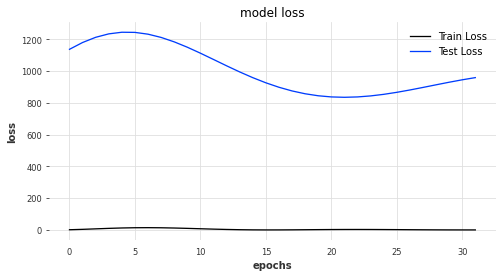

Epoch 1/200
1/1 - 0s - loss: 0.0853 - mse: 0.0853 - mae: 0.2920 - val_loss: 970.7024 - val_mse: 970.7024 - val_mae: 31.1561 - 36ms/epoch - 36ms/step
Epoch 2/200
1/1 - 0s - loss: 0.2193 - mse: 0.2193 - mae: 0.4683 - val_loss: 979.8851 - val_mse: 979.8851 - val_mae: 31.3031 - 17ms/epoch - 17ms/step
Epoch 3/200
1/1 - 0s - loss: 0.3685 - mse: 0.3685 - mae: 0.6070 - val_loss: 986.3707 - val_mse: 986.3707 - val_mae: 31.4065 - 17ms/epoch - 17ms/step
Epoch 4/200
1/1 - 0s - loss: 0.4973 - mse: 0.4973 - mae: 0.7052 - val_loss: 990.0883 - val_mse: 990.0883 - val_mae: 31.4657 - 19ms/epoch - 19ms/step
Epoch 5/200
1/1 - 0s - loss: 0.5807 - mse: 0.5807 - mae: 0.7620 - val_loss: 991.0853 - val_mse: 991.0853 - val_mae: 31.4815 - 17ms/epoch - 17ms/step
Epoch 6/200
1/1 - 0s - loss: 0.6062 - mse: 0.6062 - mae: 0.7786 - val_loss: 989.5544 - val_mse: 989.5544 - val_mae: 31.4572 - 17ms/epoch - 17ms/step
Epoch 7/200
1/1 - 0s - loss: 0.5741 - mse: 0.5741 - mae: 0.7577 - val_loss: 985.7938 - val_mse: 985.7938 -

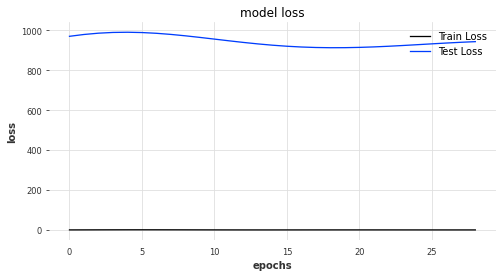

Epoch 1/250
1/1 - 0s - loss: 0.0082 - mse: 0.0082 - mae: 0.0904 - val_loss: 946.5697 - val_mse: 946.5697 - val_mae: 30.7664 - 35ms/epoch - 35ms/step
Epoch 2/250
1/1 - 0s - loss: 0.0169 - mse: 0.0169 - mae: 0.1300 - val_loss: 948.4926 - val_mse: 948.4926 - val_mae: 30.7976 - 17ms/epoch - 17ms/step
Epoch 3/250
1/1 - 0s - loss: 0.0252 - mse: 0.0252 - mae: 0.1588 - val_loss: 949.6716 - val_mse: 949.6716 - val_mae: 30.8167 - 17ms/epoch - 17ms/step
Epoch 4/250
1/1 - 0s - loss: 0.0312 - mse: 0.0312 - mae: 0.1766 - val_loss: 950.1174 - val_mse: 950.1174 - val_mae: 30.8240 - 17ms/epoch - 17ms/step
Epoch 5/250
1/1 - 0s - loss: 0.0336 - mse: 0.0336 - mae: 0.1833 - val_loss: 949.8691 - val_mse: 949.8691 - val_mae: 30.8199 - 18ms/epoch - 18ms/step
Epoch 6/250
1/1 - 0s - loss: 0.0322 - mse: 0.0322 - mae: 0.1796 - val_loss: 949.0002 - val_mse: 949.0002 - val_mae: 30.8058 - 18ms/epoch - 18ms/step
Epoch 7/250
1/1 - 0s - loss: 0.0277 - mse: 0.0277 - mae: 0.1666 - val_loss: 947.6244 - val_mse: 947.6244 -

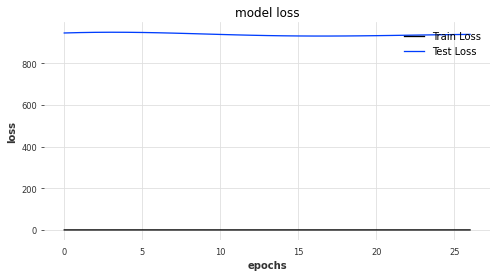

In [90]:
l=[50,100,150,200,250]
for i in l:
    call(i)